### CUNY Data 620 - Web Analytics, Summer 2020
**Group Project 1**  
**Prof:** Alain Ledon  
**Members:** Misha Kollontai, Amber Ferger, Zach Alexander, Subhalaxmi Rout  

### Instructions
1. Identify a large 2-node network dataset—you can start with a dataset in a repository.  Your data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.
2. Reduce the size of the network using a method such as the island method described in chapter 4 of social network analysis.
3. What can you infer about each of the distinct groups?

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as spy
import numpy as np
import statistics

In [2]:
composerFile = "data/composers.txt"

composers = []
composerfile = open(composerFile, 'r') 
for line in composerfile.readlines(): 
    for element in line[0:-1].split('\t'):
        composers.append(element)
composers = [item for item in composers if composers not in ['\n', '']]
composers = [string for string in composers if string != ""]

In [3]:
producerFile = "data/producers.txt"

producers = []
producerfile = open(producerFile, 'r') 
for line in producerfile.readlines(): 
    for element in line[0:-1].split('\t'):
        producers.append(element)
producers = [item for item in producers if producers not in ['\n', ',']]
producers = [string for string in producers if string != ""]

In [4]:
interaction_matrix = "data/matrix.txt"

interaction_mat = []
interactfile = open(interaction_matrix, 'r') 
for line in interactfile.readlines(): 
    for element in line[0:-1].split('\n'):
        interaction_mat.append(element)
interaction_mat = [item for item in interaction_mat if interaction_mat not in ['\n', '']]
interaction_mat = [string for string in interaction_mat if string != ""]

In [5]:
producers = "\n".join(producers)
composers = "\n".join(composers)
interaction_mat = "\n".join(interaction_mat)

In [10]:
def hollywood_graph(create_using=None, **kwds):
    composers_num=40
    producers_num=62
    g=nx.generators.empty_graph(composers_num+producers_num,create_using=create_using,**kwds)
    g.clear()
    g.name="Hollywood Film Music"
    
    # loading the women's names
    producers_list=producers

    # loading the club names
    composers_list=composers

    # loading the interaction matrix
    interaction_matrix=interaction_mat
    
    # creating a list of women names
    c={}
    n=0
    for name in composers_list.split('\n'):
        c[n]=name
        n+=1

    # creating a list of club names
    p={}
    n=0
    for name in producers_list.split('\n'):
        p[n]=name
        n+=1
        
    print(len(p))
    print(len(c))
        
    # parsing our interactions matrix, adding edges
    row=0
    for line in interaction_matrix.split('\n'):
        thisrow=list(map(int,line.split()))
        for col in range(0,len(thisrow)):
            if thisrow[col]>0:
                g.add_edge(p[row],c[col], weight=thisrow[col])
        row+=1
    return (g, list(p.values()),list(c.values()))

In [12]:
(g, producers, composers)=hollywood_graph()

62
40


In [13]:
print(nx.info(g))

Name: Hollywood Film Music
Type: Graph
Number of nodes: 101
Number of edges: 192
Average degree:   3.8020


In [14]:
g.nodes

NodeView(('Rosenberg, A.', 'Goldsmith, J.', 'Devol, F.', 'Bernstein, E.', 'Chartoff-Winkler', 'Grusin, D.', 'Jones, Q.', 'Fielding, J.', 'Karlin, F.', 'Wise, R.', 'Shire, D.', 'Schwartz, M.', 'Schifrin, L.', 'North, A.', 'Arthur, R.', 'Rosenman, L.', 'Mizzy, V.', 'Dehaven, C.', 'Phillips, S', 'Fryer-Cresson', 'Montagne, E.', 'Hefti, N.', 'Edwards, B.', 'Mancini, H.', 'Lewis, E.', 'Hibler, W.', 'Sherman, R/R', 'Bruns, G.', 'Baker, B.', 'Jarre, M.', 'David, S.', 'Jacobs, A.', 'Preminger, O.', 'Myrow, F.', 'Seltzer, W.', 'Frontiere, D.', 'Conrad, W.', 'Dorfman, R.', 'Towers, I.', 'Anderson, B.', 'Brunner, R.', 'Miller, R.', 'Walsh, B.', 'Turman-Foster', 'Mandel, J.', 'Small, M.', 'Radnitz, R.', 'Lyles, A.C.', 'Haskell, J.', 'Aldrich, R.', 'Fried, J.', 'Arkoff, S.', 'Baxter, L.', 'Bernstein, C.', 'Katzman, S.', 'Karger, F.', 'Pressman, E.', 'Corman, R.', 'Wallis, H.', 'Barry, J.', 'Rosenthal, L.', 'Jewison, N.', 'Williams, J.', 'Legrand, M.', 'Previn, A.', 'Allen, I.', 'Mirisch, W.', 'Wein

In [15]:
nx.is_bipartite(g)

True

In [16]:
g.edges

EdgeView([('Rosenberg, A.', 'Goldsmith, J.'), ('Rosenberg, A.', 'Devol, F.'), ('Rosenberg, A.', 'Bernstein, E.'), ('Goldsmith, J.', 'Chartoff-Winkler'), ('Goldsmith, J.', 'Wise, R.'), ('Goldsmith, J.', 'Schwartz, M.'), ('Goldsmith, J.', 'Arthur, R.'), ('Goldsmith, J.', 'Dehaven, C.'), ('Goldsmith, J.', 'Fryer-Cresson'), ('Goldsmith, J.', 'Montagne, E.'), ('Goldsmith, J.', 'Edwards, B.'), ('Goldsmith, J.', 'Lewis, E.'), ('Goldsmith, J.', 'Hibler, W.'), ('Goldsmith, J.', 'David, S.'), ('Goldsmith, J.', 'Jacobs, A.'), ('Goldsmith, J.', 'Preminger, O.'), ('Goldsmith, J.', 'Seltzer, W.'), ('Goldsmith, J.', 'Dorfman, R.'), ('Goldsmith, J.', 'Turman-Foster'), ('Goldsmith, J.', 'Wallis, H.'), ('Goldsmith, J.', 'Kastner, E.'), ('Devol, F.', 'Aldrich, R.'), ('Devol, F.', 'Kramer, S.'), ('Bernstein, E.', 'Lewis, E.'), ('Bernstein, E.', 'Wallis, H.'), ('Bernstein, E.', 'Allen, I.'), ('Bernstein, E.', 'Mirisch, W.'), ('Bernstein, E.', 'Frankovich, M.'), ('Bernstein, E.', 'Delaurentis, D.'), ('Berns

In [17]:
print(g.edges[('Rosenberg, A.', 'Goldsmith, J.')])

{'weight': 3}


C:\Users\Misha\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


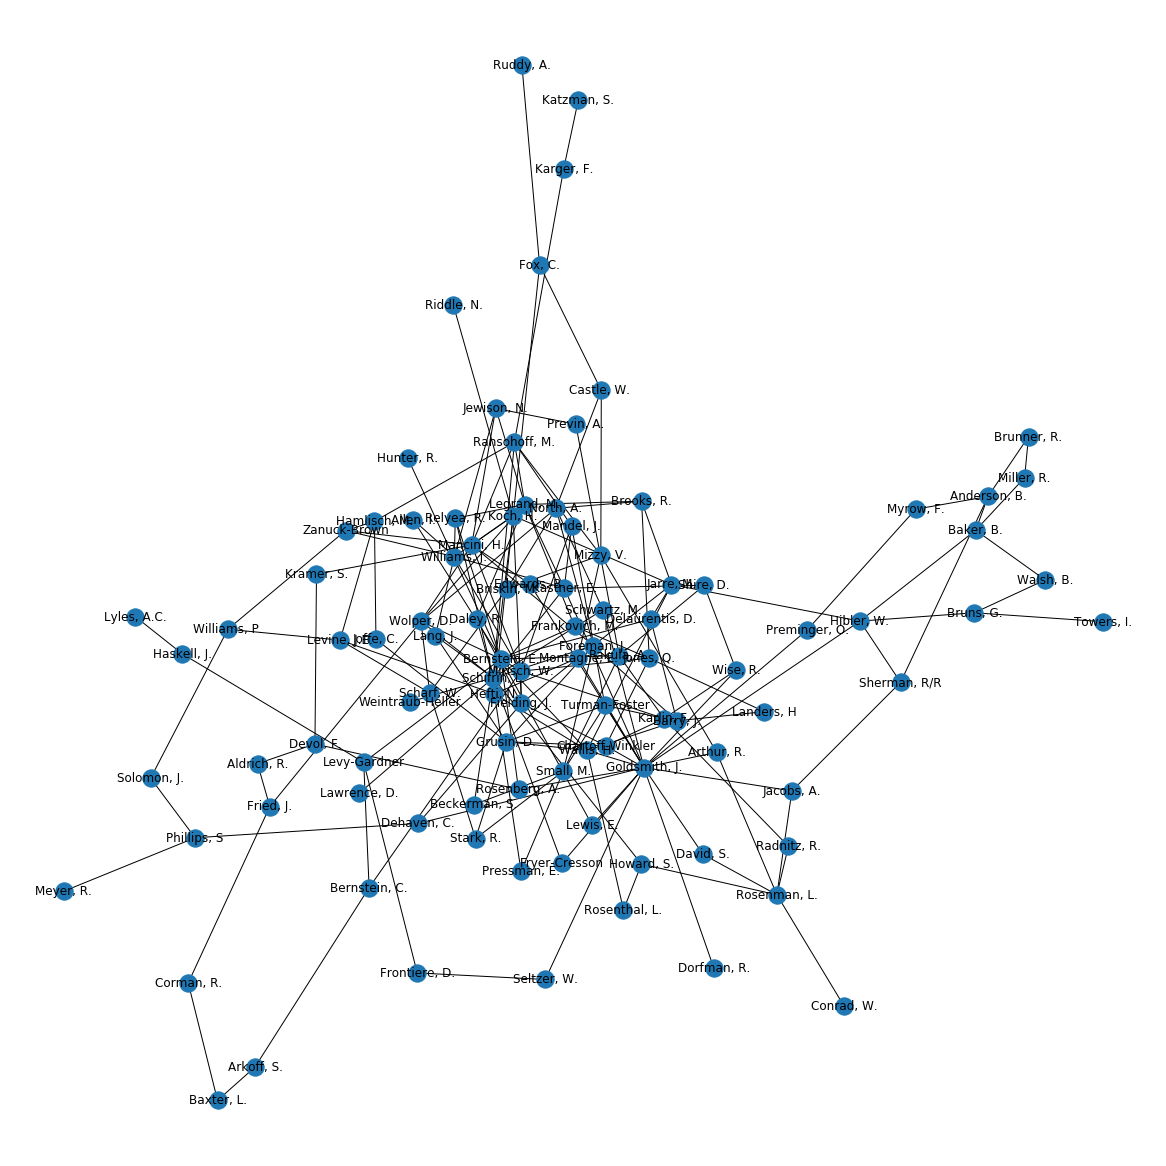

In [18]:
plt.rcParams['figure.figsize'] = [16, 16]
labels = nx.get_edge_attributes(g,'weight')
labels
nx.draw_spring(g, with_labels='true')

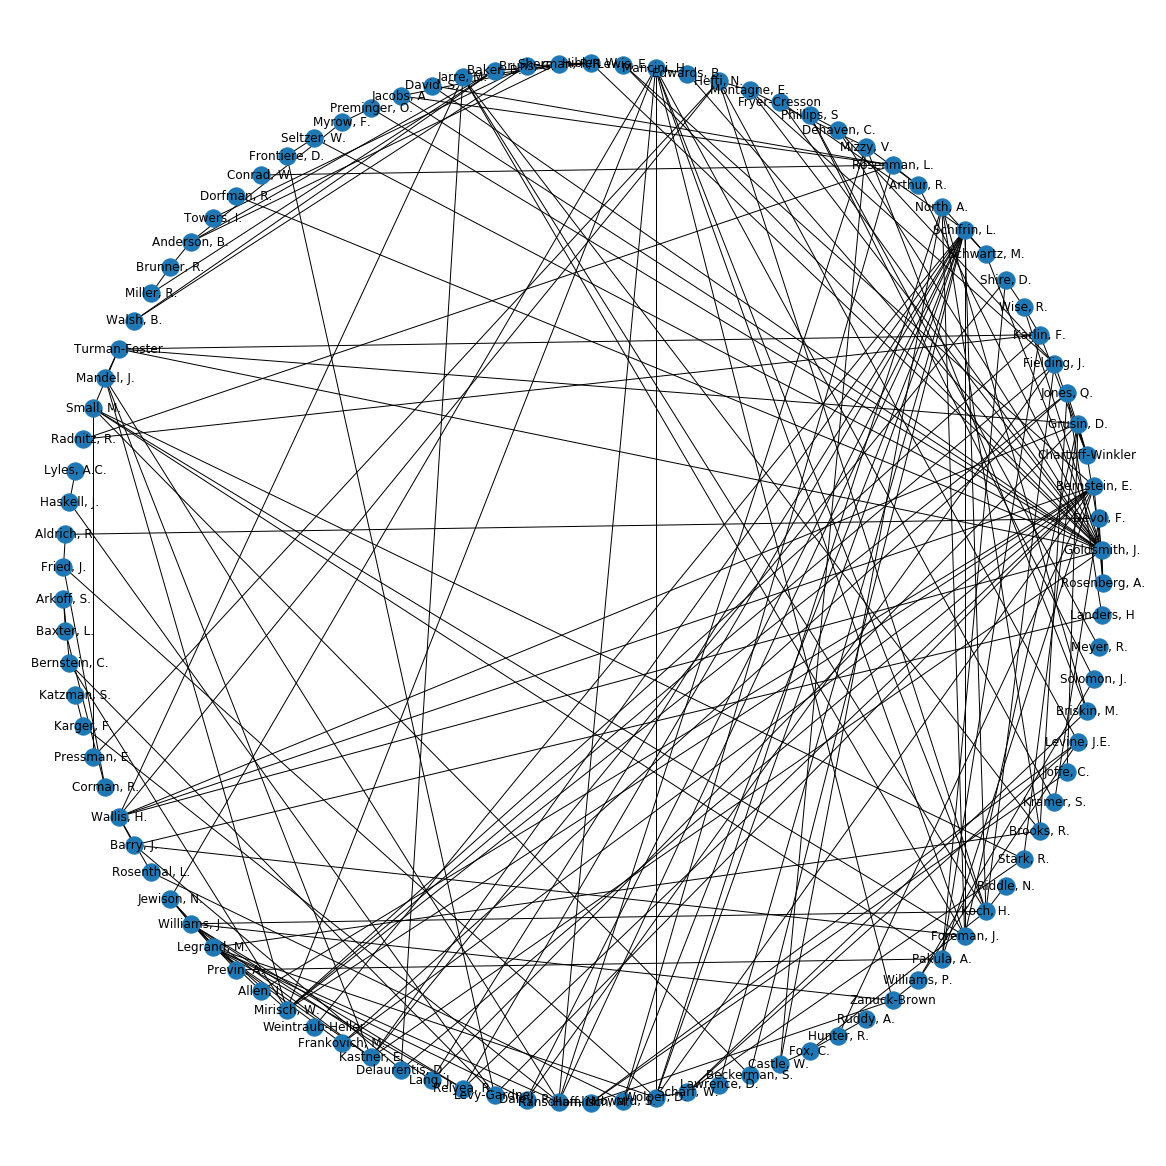

In [19]:
nx.draw_circular(g, with_labels='true')

In [20]:
nx.is_bipartite(g)

True

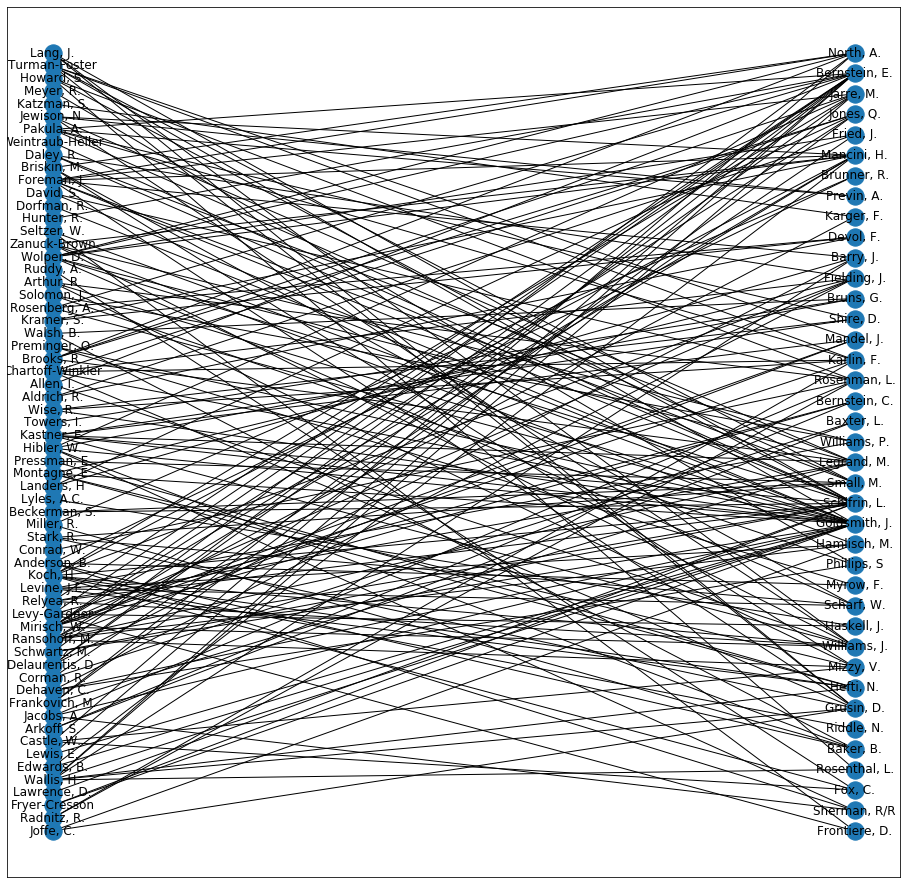

In [21]:
top = nx.bipartite.sets(g)[0]
pos = nx.bipartite_layout(g,top)
nx.draw_networkx(g,pos)

In [99]:
def trim_edges(g, weight=1):
        g2=nx.Graph()
        for f, to, edata in g.edges(data=True):
                if edata['weight'] > weight:
                        key, val = next(iter(edata.items()))
                        g2.add_edge(f,to,weigh = val)
        return g2

In [109]:
def island_method(g, iterations=5):
    weights= [edata['weight'] for f,to,edata in g.edges(data=True)]

    mn=int(min(weights))
    mx=int(max(weights))
    #compute the size of the step, so we get a reasonable step in iterations
    step=int((mx-mn)/iterations)

    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn,mx,step)]

In [121]:
islands=island_method(g)
for i in islands:
    # print the threshold level, size of the graph, and number of connected components
    print (i[0], len(i[1]), nx.number_connected_components(i[1]))

1 71 15
2 34 14
3 22 10
4 14 6
5 8 4
6 6 3
7 2 1


In [29]:
help(nx.connected_component_subgraphs)

Help on function connected_component_subgraphs in module networkx.algorithms.components.connected:

connected_component_subgraphs(G, copy=True)
    DEPRECATED: Use ``(G.subgraph(c) for c in connected_components(G))``
    
    Or ``(G.subgraph(c).copy() for c in connected_components(G))``



In [122]:
islands

[[1, <networkx.classes.graph.Graph at 0x2996f7d1188>],
 [2, <networkx.classes.graph.Graph at 0x2996f795788>],
 [3, <networkx.classes.graph.Graph at 0x2996f541848>],
 [4, <networkx.classes.graph.Graph at 0x2996f791808>],
 [5, <networkx.classes.graph.Graph at 0x2996f7914c8>],
 [6, <networkx.classes.graph.Graph at 0x2996f7915c8>],
 [7, <networkx.classes.graph.Graph at 0x2996f791e88>]]

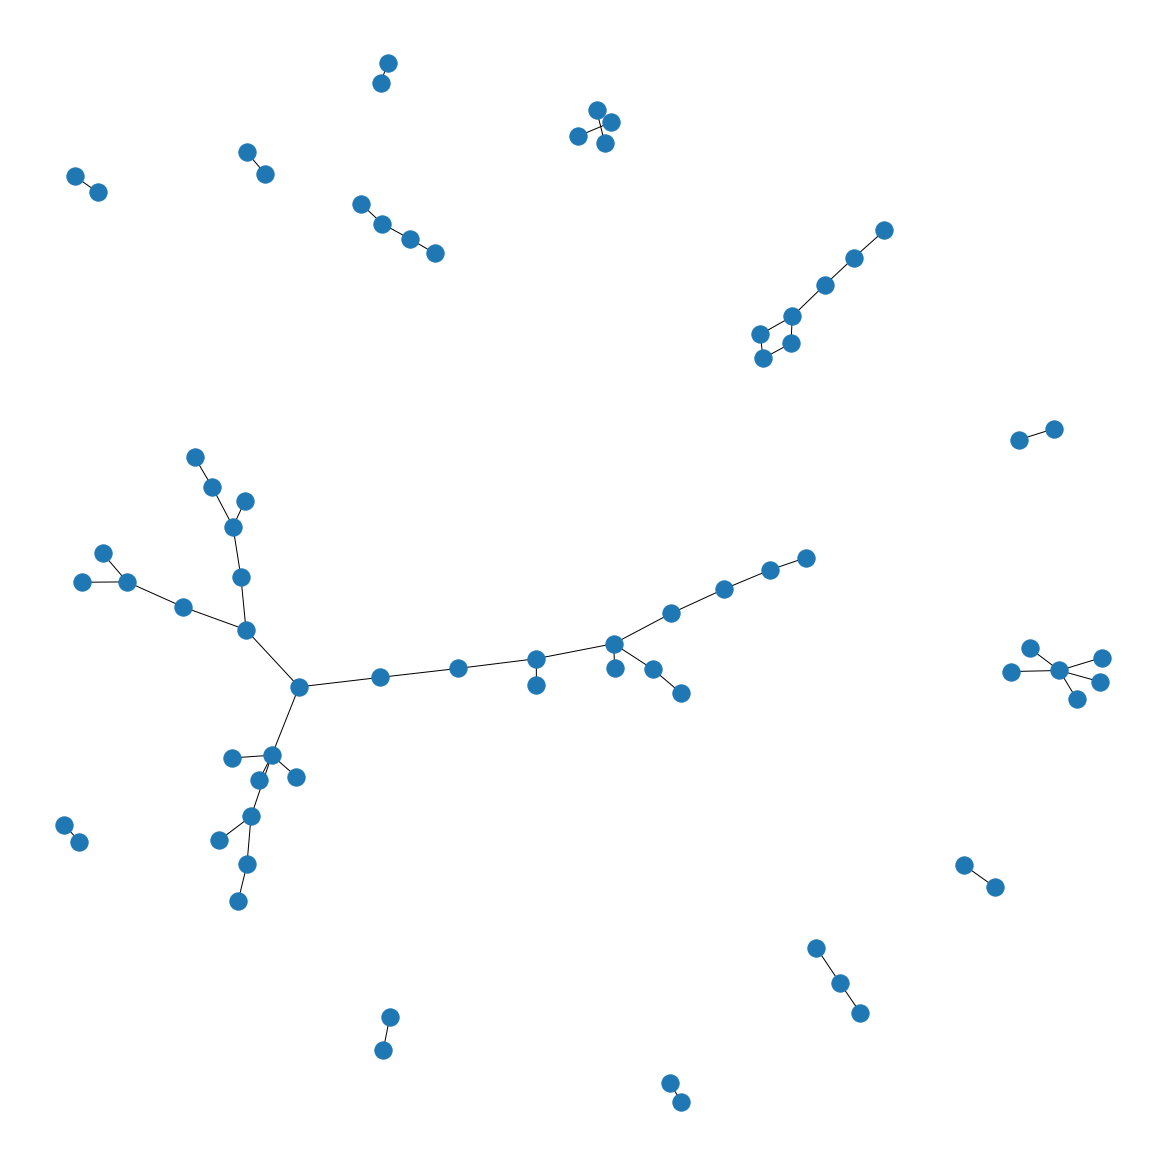

In [134]:
temp = islands[0]
G = temp[1]
nx.draw(G)